In [14]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# red, blue, green, yellow, purple, orange, teal blue, pink, other color
palette=['#4cd964','#ffcc00',  '#007aff','#5856d6', '#ff9500','#ff3b30',  '#5ac8fa', '#ff2d55','#969783']
markers=['o', '^', '<', 'd', '*','2']
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth']=1
rc("font", **{'family':'serif','serif':['Palatino'], 'size':16})
rc('text', usetex=False)
import os

In [15]:
basepath="./"

In [30]:

def plot_quantile_nmse(total, name, title, metric_name, use_logy=False, show_ylabel=True, useabs=True, use_hatches=True):
    if useabs:
        ode_transformer=[abs(float(line.split("\t")[0])) for line in total.split("\n")]
        act_ode=[abs(float(line.split("\t")[1])) for line in total.split("\n")]
        pysindy=[abs(float(line.split("\t")[2])) for line in total.split("\n")]
        e2e=[abs(float(line.split("\t")[3])) for line in total.split("\n")]
        spl=[abs(float(line.split("\t")[4])) for line in total.split("\n")]
        proged=[abs(float(line.split("\t")[4])) for line in total.split("\n")]
    else:
        ode_transformer=[(float(line.split("\t")[0])) for line in total.split("\n")]
        act_ode=[(float(line.split("\t")[1])) for line in total.split("\n")]
        pysindy=[(float(line.split("\t")[2])) for line in total.split("\n")]
        e2e=[(float(line.split("\t")[3])) for line in total.split("\n")]
        spl=[(float(line.split("\t")[4])) for line in total.split("\n")]
        proged=[(float(line.split("\t")[4])) for line in total.split("\n")]
    length=len(total.split("\n"))
    print(length)
    df=pd.DataFrame({
        "model": spl+e2e+proged+pysindy+ode_transformer+act_ode,
        "type": ['SPL']*length+['E2ETransformer']*length+['ProGED']*length+['SINDy']*length+['ODEFormer']*length+['APPS (ours)']*length,
    })
    

    plt.figure(figsize=(3.5,3.5))
    ax=sns.boxplot(data=df, x="model", y="type", 
                   showfliers=True, 
                   width=0.5, hue='type',
                    palette=palette)
    ax.set_title(title, fontsize=16)
    ax.set(xlabel=metric_name, ylabel="")
    if use_logy==True:
        plt.xscale('log', base=10)
        
    if show_ylabel==False:
        ax.set(yticklabels=[])
    if use_hatches==True:
        hatches = ["/", "o", "*", "\\"]
        for hatch, patch in zip(hatches, ax.artists):
            patch.set_hatch(hatch)
    plt.yticks(rotation=40)    

    fname = os.path.join(basepath, name+".pdf")
    print(fname)
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

# Strongatz dataset

23
./strogatz_Normalizd MSE Metric_vars1.pdf


/var/folders/1c/8_t_8nt12b9fdnw5n_xvj9m40000gn/T/ipykernel_90830/632330098.py:25: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax=sns.boxplot(data=df, x="model", y="type",


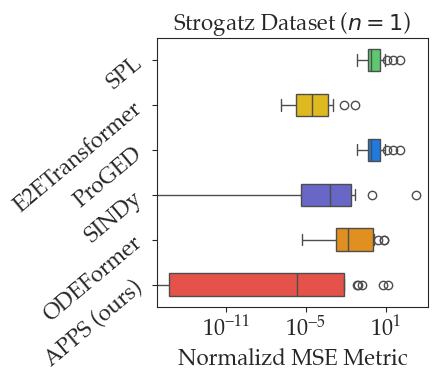

In [31]:
total="""0.004187060702	nan	-0.0002251045031	-1.81E-06	-1.207395211	-0.1361780638
1.93E-05	0	-inf	-3.48E-05	-127.3875936	0
0.005040090376	-3.38E-16	-4.44E-05	-0.0002629990663	-1.903952974	-3.033972814
0.008444352462	-3.13E-18	-0.04635260437	-0.007292051905	-0.06646724323	-0.01536212434
0.001390256179	-4.00E-06	-0.02391188371	-inf	-0.4585272227	-inf
0.9937783921	-0.1673301492	-1863.123382	-inf	-0.6773151246	-0.09141610223
0.09801504605	-0.003072098889	-inf	-1.31E-07	-0.3793025636	-0.09397577012
1.121751673	-0.0004341880742	0	-inf	-0.8966906715	-1.015211598
8.270076057	-1.20E-07	-3.61E-05	-inf	-0.6435622129	-0.05622097081
0.001156716853	-8.32E-06	-7.78E-06	-0.001115768516	-37.48213561	-3.003562486
0.2095195479	-8.90E-16	-5.86E-07	-1.54E-06	-4.536822459	-0.5263597659
1.364097228	-6.774733802	-0.01591764632	-0.000515138179	-2.772623479	-0.066248064
0.03856159872	-0.08000183193	-0.02767699647	-4.09E-06	-0.4851002184	-0.01239339587
0.0004189361024	-0.007813674066	-0.0007058913698	-2.53E-05	-12.77928216	-0.1591367947
0.002577059738	-7.01E-18	-0.976483208	-0.0538745626	-0.1994973281	-0.2536711703
0.0138877647	-3.24E-18	0	-7.38E-07	-0.6115099443	-0.09449235981
0.1018359252	-2.89E-16	-0.00162256869	-inf	-0.4593254245	-inf
2.659891547	-0.07300326977	-0.04157226777	-3.29E-05	-0.2451888101	-0.001590352028
0.001395978476	-15.06006074	-0.001038866987	-4.43E-07	-0.2967511013	-0.129204023
4.61E-06	-6.58E-15	-1.58E-31	-0.0002667180909	-6.000867152	-0.3013477143
8.057234096	-0.00696794363	-inf	-0.001005148556	nan	-0.003593700149
0.01036744719	-1.90E-09	-inf	-2.07E-06	-0.8992120759	-0.9259677129
1.312553053	-4.05E-15	0	-1.63E-05	-8.762912083	-0.7405223038"""
metric_name="Normalizd MSE Metric"
name=r"strogatz_"+metric_name+"_vars1"
title="Strogatz Dataset ("+r"$n=1$"+")"
plot_quantile_nmse(total, name, title,metric_name=metric_name, use_logy=True, show_ylabel=True)


23
./strogatz_$R^2$ score_vars1.pdf


/var/folders/1c/8_t_8nt12b9fdnw5n_xvj9m40000gn/T/ipykernel_90830/632330098.py:25: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax=sns.boxplot(data=df, x="model", y="type",


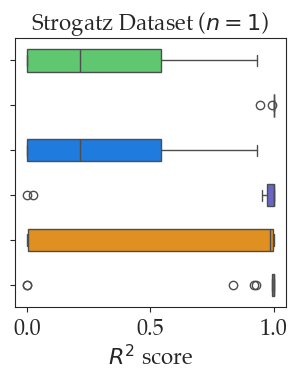

In [34]:
total="""0.99581293929765	nan	0.99977489549694	0.99999819160439	0.00000000000000	0.86382193623620
0.99998065879466	1.00000000000000	nan	0.99996518323794	0.00000000000000	1.00000000000000
0.99495990962384	1.00000000000000	0.99995559823447	0.99973700093374	0.00000000000000	0.00000000000000
0.99155564753751	1.00000000000000	0.95364739562923	0.99270794809503	0.93353275676933	0.98463787566336
0.99860974382123	0.99999599731556	0.97608811629092	nan	0.54147277729437	nan
0.00622160788694	0.83266985082746	0.00000000000000	nan	0.32268487535060	0.90858389777191
0.90198495394888	0.99692790111052	nan	0.99999986897418	0.62069743643551	0.90602422987791
0.00000000000000	0.99956581192576	1.00000000000000	nan	0.10330932849358	0.00000000000000
0.00000000000000	0.99999987968940	0.99996391324944	nan	0.35643778709491	0.94377902919295
0.99884328314723	0.99999167999915	0.99999221513385	0.99888423148416	0.00000000000000	0.00000000000000
0.79048045211603	1.00000000000000	0.99999941375182	0.99999846163285	0.00000000000000	0.47364023410908
0.00000000000000	0.00000000000000	0.98408235368411	0.99948486182100	0.00000000000000	0.93375193600198
0.96143840127635	0.91999816807019	0.97232300352791	0.99999590789499	0.51489978160128	0.98760660413488
0.99958106389758	0.99218632593352	0.99929410863022	0.99997469714139	0.00000000000000	0.84086320528687
0.99742294026157	1.00000000000000	0.02351679196393	0.94612543740310	0.80050267188220	0.74632882968139
0.98611223530253	1.00000000000000	1.00000000000000	0.99999926167930	0.38849005568775	0.90550764018866
0.89816407477716	1.00000000000000	0.99837743130976	nan	0.54067457552272	nan
0.00000000000000	0.92699673023322	0.95842773222632	0.99996712344186	0.75481118992477	0.99840964797188
0.99860402152439	0.00000000000000	0.99896113301273	0.99999955654204	0.70324889866110	0.87079597702215
0.99999538572195	0.99999999999999	1.00000000000000	0.99973328190905	0.00000000000000	0.69865228571501
0.00000000000000	0.99303205637042	nan	0.99899485144388	nan	0.99640629985129
0.98963255280979	0.99999999809835	nan	0.99999793094465	0.10078792411310	0.07403228708805
0.00000000000000	1.00000000000000	1.00000000000000	0.99998374852010	0.00000000000000	0.25947769622885"""
metric_name=r"$R^2$"+' score'
name=r"strogatz_"+metric_name+"_vars1"
title="Strogatz Dataset ("+r"$n=1$"+")"
plot_quantile_nmse(total, name, title,metric_name=metric_name, use_logy=False, useabs=False,show_ylabel=False)
